In [18]:
import sys
sys.path.append('../')
import wrangle
import explore
import nlp
import matplotlib.pyplot as plt

In [3]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [4]:
def find_word_counts(input_column, max_df=.3, min_df=2, ngram_range=(1,3), stop_words='english'):
    input_column = input_column.dropna().apply(nlp.basic_clean)
    input_column = input_column.apply(nlp.lemmatize)
    cv = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=stop_words, ngram_range=ngram_range)   
    cv_fit=cv.fit_transform(input_column)    
    word_list = cv.get_feature_names()    
    count_list = cv_fit.toarray().sum(axis=0)
    word_counts = {'word_list': word_list, 'count_list': count_list}
    df_word_count = pd.DataFrame(data=word_counts)
    return df_word_count

In [5]:
job_taxo_dict = {
    1: "UX Researcher",
    6: "Reseaerch and Design Manager",
    2: "UX Designer",
    5: "Specialist",
    7: "Consultant",
    8: "Executive",
    4: "Research Specialist",
    3: "Academic",
    9: "Other"
}

In [6]:
pd.set_option('display.max_columns', None)

df, data_dict = wrangle.wrangle_data()

In [7]:
df = explore.add_target_to_df(df)

targetB = df.targetb

targetB = targetB.reset_index().drop('resp_id',axis=1)

job_taxo = df.job_taxo.map(job_taxo_dict)

job_taxo = job_taxo.reset_index().drop('resp_id',axis=1)

big_df = pd.read_csv('topics.csv', index_col=False)

big_df.drop('Unnamed: 0', axis=1,inplace=True)

big_df['targetB'] = targetB

big_df['job_taxo'] = job_taxo

likely = big_df[big_df.targetB == 1]

In [8]:
likely.shape

(372, 33)

In [9]:
stop_words = ['like', 'plus', 'real', 'love', 'big', 'avoiding', 'mean', 'content', 'people', 'problem', 
              'doing', 'using','research', 'work', 'don', 'make', 'conference', 'yes', 've', 'ha', '300']

stopWords = nlp.set_stop_words(stop_words)

# Respondents Likely To Go

## Sentiment

In [10]:
likely.big_answer.apply(nlp.find_polarity).mean()

0.22151873416100337

In [11]:
likely.big_answer.apply(nlp.find_subjectivity).mean()

0.4278503728167686

## TOTAL KEYWORDS

In [12]:
nlp.show_column_keywords(likely.big_answer, max_df=.8, stop_words=stopWords, ngram_range=(1,3))

['sort',
 'psychology',
 'professional',
 'depending',
 'connection',
 'researchresearch',
 'method',
 'statistic',
 'training',
 'undergraduate',
 'graduate',
 'cost',
 'timing',
 'away',
 'time',
 'scheduling',
 'workshop',
 'small',
 'intimate',
 'international']

In [13]:
big_answer_df = find_word_counts(likely.big_answer, max_df=.2, stop_words=stopWords, ngram_range=(2,3))
big_answer_df.sort_values(by='count_list').tail(20)

,word_list,count_list
428,emerges want,18
154,bring schedule,18
87,attendee bring schedule,18
1105,schedule emerges want,18
1116,service design,24
272,conduct researchphd,24
1259,taught conduct researchphd,24
15,300500 attendeessingletrack attendee,25
14,300500 attendeessingletrack,25
170,case study,31


## Most Common Job Titles

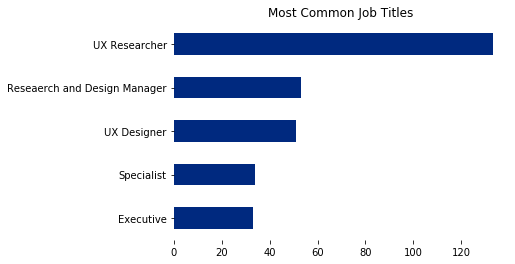

In [14]:
ax = likely.job_taxo.value_counts(ascending=True).tail(5).plot.barh(legend=False,
                                                       color="#00297f",
                                                       title="Most Common Job Titles")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

## What does your company do?

q5 primary industry

### keywords

In [15]:
nlp.show_column_keywords(likely.prim_ind_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))

['higher',
 'education',
 'higher education',
 'university',
 'ed',
 'tech',
 'healthcare',
 'government',
 'public',
 'service',
 'public service',
 'academic',
 'development',
 'science',
 'learning',
 'health',
 'software',
 'user',
 'experience',
 'user experience']

In [16]:
#words
prim_ind_df = find_word_counts(likely.prim_ind_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
prim_ind_df.sort_values(by='count_list').tail(10)

,word_list,count_list
77,retail,15
82,service,16
42,government,18
18,consulting,20
85,software,21
87,tech,21
88,technology,22
41,fintech,24
28,education,29
44,healthcare,30


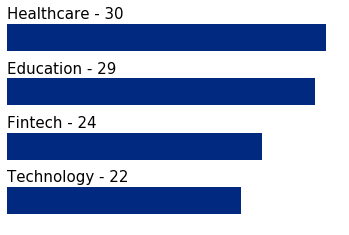

In [23]:
ax = prim_ind_df.sort_values(by='count_list').tail(4).plot.barh(x='word_list', 
                                                                y='count_list', 
                                                                legend=False, 
                                                                color="#00297f",)
#                                                                 title="Most Common Industries")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.annotate('Healthcare - 30',    (0,3.35),   fontsize=15,)
plt.annotate('Education - 29', (0,2.35),   fontsize=15,)
plt.annotate('Fintech - 24', (0,1.35),   fontsize=15,)
plt.annotate('Technology - 22',     (0,0.35), fontsize=15,)
plt.yticks([],[])
plt.xticks([],[])
plt.savefig('../viz_files/high_most_com_industry.png', transparent = True)

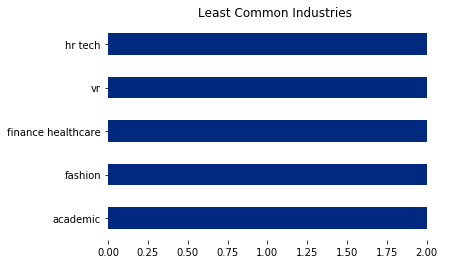

In [24]:
ax = prim_ind_df.sort_values(by='count_list').head(5).plot.barh(x='word_list', 
                                                                y='count_list', 
                                                                legend=False, 
                                                                color="#00297f",
                                                                title="Least Common Industries")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [25]:
nlp.show_column_keywords(likely.prim_ind_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))

['higher education',
 'public service',
 'user experience',
 'professional service',
 'consultancy government',
 'public sector',
 'resource technology',
 'higher ed',
 'digital agency',
 'finance healthcare',
 'hr tech',
 'ux agency',
 'social medium',
 'information technology',
 'financial service',
 'enterprise software',
 'consumer electronics',
 'cloud infrastructure',
 'commercial estate']

In [26]:
#ngrams
prim_ind_df = find_word_counts(likely.prim_ind_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
prim_ind_df.sort_values(by='count_list').tail(5)

,word_list,count_list
13,public sector,3
16,social medium,3
9,higher education,3
17,user experience,4
7,financial service,6


In [27]:
likely[likely.prim_ind_text.notnull()].prim_ind_topic_id.value_counts()

commerce/consulting    56
education              55
fintech                51
misc                   50
government             42
software               41
healthcare             40
tech                   37
Name: prim_ind_topic_id, dtype: int64

## What kind of research are you doing?

q7 future_res

### keywords

In [28]:
nlp.show_column_keywords(likely.future_res_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))

['qualitative',
 'quantitative',
 'qualitative quantitative',
 'online',
 'survey',
 'interview',
 'focus',
 'group',
 'secondary',
 'data',
 'field',
 'testing',
 'observation',
 'usability',
 'study',
 'survey interview',
 'interview focus',
 'focus group',
 'testing observation',
 'observation usability']

In [29]:
#words
future_res_text_df = find_word_counts(likely.future_res_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
future_res_text_df.sort_values(by='count_list').tail(10)

,word_list,count_list
233,user,22
49,diary study,23
158,remote,23
48,diary,24
40,data,25
193,survey,27
227,usability,27
117,method,28
188,study,39
207,testing,49


In [30]:
nlp.show_column_keywords(likely.future_res_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))

['qualitative quantitative',
 'survey interview',
 'interview focus',
 'focus group',
 'testing observation',
 'observation usability',
 'usability study',
 'interview focus group',
 'mixed method',
 'participatory design',
 'diary study',
 'study contextual',
 'usability testing',
 'data analysis',
 'diary study contextual',
 'field study',
 'quantitative qualitative',
 'user experience',
 'qual quant',
 'workshop survey']

In [31]:
#ngrams
future_res_text_df = find_word_counts(likely.future_res_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
future_res_text_df.sort_values(by='count_list').tail(5)

,word_list,count_list
32,mixed method,7
21,focus group,8
1,ab testing,12
75,usability testing,16
15,diary study,23


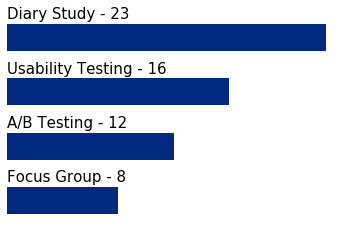

In [37]:
ax = future_res_text_df.sort_values(by='count_list').tail(4).plot.barh(x='word_list', 
                                                                       y='count_list',                                                                         
                                                                       legend=False, 
                                                                       color="#00297f",)
#                                                                        title="Future Research Methods")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.annotate('Diary Study - 23',    (0,3.35),   fontsize=15,)
plt.annotate('Usability Testing - 16', (0,2.35),   fontsize=15,)
plt.annotate('A/B Testing - 12', (0,1.35),   fontsize=15,)
plt.annotate('Focus Group - 8',     (0,0.35), fontsize=15,)
plt.yticks([],[])
plt.xticks([],[])
plt.savefig('../viz_files/high_future_res.png', transparent = True)

### topics

In [38]:
likely[likely.future_res_text.notnull()].future_res_topic_id.value_counts()

evaluative, quantitative, qualitative    76
focus group                              57
market research                          41
card sort                                36
moderate, unmoderate                     29
misc                                     26
journey mapping                          21
inquiry                                  21
Name: future_res_topic_id, dtype: int64

## What kind of research are you doing?

q6 types_res_used

### keywords

In [39]:
nlp.show_column_keywords(likely.types_res_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))

['qualitative',
 'quantitative',
 'qualitative quantitative',
 'user',
 'design',
 'interview',
 'survey',
 'testing',
 'quant',
 'qual',
 'analytics',
 'user design',
 'interview survey',
 'user testing',
 'testing quant',
 'quant qual',
 'focus',
 'group',
 'secondary',
 'data']

In [40]:
#words
types_res_df = find_word_counts(likely.types_res_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
types_res_df.sort_values(by='count_list').tail(10)

,word_list,count_list
349,quantitative,49
10,analytics,50
409,study,67
544,usability testing,75
554,user,88
325,qualitative,94
427,survey,136
475,testing,139
534,usability,140
184,interview,170


In [41]:
nlp.show_column_keywords(likely.types_res_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))

['qualitative quantitative',
 'user design',
 'interview survey',
 'user testing',
 'testing quant',
 'quant qual',
 'survey interview',
 'interview focus',
 'focus group',
 'data qualitative',
 'qualitative coding',
 'survey interview focus',
 'interview focus group',
 'quantitative survey',
 'quantitative data',
 'qualitative data',
 'group user',
 'user interview',
 'focus group user',
 'group user interview']

In [42]:
#ngrams
types_res_df = find_word_counts(likely.types_res_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
types_res_df.sort_values(by='count_list').tail(10)

,word_list,count_list
348,user testing,19
319,usability study,19
116,interview survey,20
119,interview usability,22
43,diary study,22
25,contextual inquiry,23
321,usability test,23
338,user interview,24
65,focus group,31
326,usability testing,75


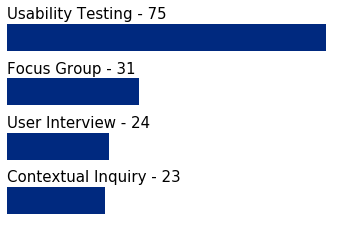

In [50]:
ax = types_res_df.sort_values(by='count_list').tail(4).plot.barh(x='word_list',
                                                                 y='count_list', 
                                                                 legend=False, 
                                                                 color="#00297f",)
#                                                                  title="Current Reasearch Methods")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.annotate('Usability Testing - 75',    (0,3.35),   fontsize=15,)
plt.annotate('Focus Group - 31', (0,2.35),   fontsize=15,)
plt.annotate('User Interview - 24', (0,1.35),   fontsize=15,)
plt.annotate('Contextual Inquiry - 23',     (0,0.35), fontsize=15,)

plt.xticks([],[])
plt.yticks([],[])

plt.savefig('../viz_files/high_curr_res.png', transparent = True)

### topics

In [26]:
likely[likely.types_res_text.notnull()].types_res_topic_id.value_counts()

focus group                62
ngram                      60
validation                 49
market                     47
qual/quant                 42
testing                    39
generative/mixed method    26
misc                       23
Name: types_res_topic_id, dtype: int64

## What topics would they be most attracted to at a conference about research?

q21 ideal_topics

In [27]:
stop_words = ['like', 'plus', 'real', 'love', 'big', 'avoiding', 'mean', 'content', 'people', 'problem', 
              'doing', 'using','research', 'work', 'don', 'make', 'conference', 'good', 'best', 'self', 'report']

In [28]:
stopWords = nlp.set_stop_words(stop_words)

### keywords

In [29]:
nlp.show_column_keywords(likely.ideal_topics_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))

['design',
 'innovative',
 'method',
 'communicating',
 'working',
 'nonresearchers',
 'cycle',
 'innovative method',
 'method communicating',
 'participatory',
 'analysis',
 'design participatory',
 'session',
 'new',
 'methodology',
 'case',
 'study',
 'new methodology',
 'case study',
 'participant']

In [30]:
#words
ideal_topics_df = find_word_counts(likely.ideal_topics_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
ideal_topics_df.sort_values(by='count_list').tail(10)

,word_list,count_list
53,case study,23
293,product,24
102,design,27
52,case,27
285,practice,28
386,technique,29
18,analysis,31
371,study,33
249,new,36
231,method,83


In [31]:
nlp.show_column_keywords(likely.ideal_topics_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))

['innovative method',
 'method communicating',
 'design participatory',
 'new methodology',
 'case study',
 'participant recruitment',
 'recruitment strategy',
 'participant recruitment strategy',
 'method practice',
 'space solution',
 'theory practice',
 'sell qualitative',
 'qualitative quantitative',
 'qualitative data',
 'want hear',
 'creative approach',
 'conducting analyzing',
 'cutting edge',
 'application method',
 'data science']

In [32]:
#bi-grams
ideal_topics_df = find_word_counts(likely.ideal_topics_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
ideal_topics_df.sort_values(by='count_list').tail(5)

,word_list,count_list
58,product team,5
48,new technique,5
46,new method,8
45,mixed method,9
10,case study,23


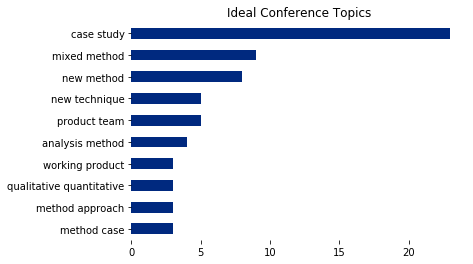

In [147]:
ax = ideal_topics_df.sort_values(by='count_list').tail(10).plot.barh(x='word_list', 
                                                                     y='count_list',
                                                                     legend=False, 
                                                                     color="#00297f",
                                                                     title="Ideal Conference Topics")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### topics

In [33]:
likely[likely.ideal_topics_text.notnull()].ideal_topics_topic_id.value_counts()

quant/qual/data             77
case_study                  73
new_method, mixed_method    71
ops/ai                      63
Name: ideal_topics_topic_id, dtype: int64

## Who would they expect to see at a conference about research?

q22 Ideal Attendees

In [34]:
stop_words = ['like', 'plus', 'real', 'love', 'big', 'avoiding', 'mean', 'content', 'people', 'problem', 
              'doing', 'using','research', 'work', 'don', 'make', 'conference']

stopWords = nlp.set_stop_words(stop_words)

In [35]:
nlp.show_column_keywords(likely.ideal_attendees_text, max_df=.5, stop_words=stopWords)

['company',
 'academic',
 'researcher',
 'public',
 'maker',
 'academic researcher',
 'leading',
 'known',
 'skill',
 'set',
 'expertise',
 'good',
 'sam',
 'ladner',
 'sam ladner',
 'open',
 'woman',
 'minority',
 'walk',
 'just']

In [36]:
#terms
ideal_attendees_df = find_word_counts(likely.ideal_attendees_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
ideal_attendees_df.sort_values(by='count_list').tail(10)

,word_list,count_list
333,steve portigal,14
234,new,17
179,just,17
331,steve,17
118,field,20
73,different,21
161,industry,23
47,company,32
197,leader,34
288,researcher,52


In [37]:
nlp.show_column_keywords(likely.ideal_attendees_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))

['academic researcher',
 'sam ladner',
 'different field',
 'civic tech',
 'steve portigal',
 'working company',
 'kim goodwin',
 'laura klein',
 'way working',
 'industry folk',
 'social scientist',
 'industry thought',
 'thought leader',
 'natalie hanson',
 'industry leader',
 'jared spool',
 'spool steve',
 'google facebook',
 'jared spool steve',
 'spool steve portigal']

In [38]:
#bigrams
ideal_attendees_df = find_word_counts(likely.ideal_attendees_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
ideal_attendees_df.sort_values(by='count_list').tail(5)

,word_list,count_list
18,erika hall,7
32,jared spool,8
26,indi young,8
56,sam ladner,11
63,steve portigal,14


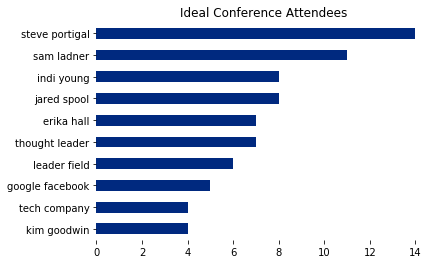

In [148]:
ax = ideal_attendees_df.sort_values(by='count_list').tail(10).plot.barh(x='word_list', 
                                                                       y='count_list', 
                                                                       legend=False, 
                                                                       color="#00297f",
                                                                       title="Ideal Conference Attendees")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [39]:
likely[likely.ideal_attendees_text.notnull()].ideal_attendees_topic_id.value_counts()

industry, team, product    76
sam ladner, erika hall     55
indi young                 52
experience, jared spool    52
Name: ideal_attendees_topic_id, dtype: int64

## What advice do they have for the Rosenfeld Media team in pursuing a conference?
q23 recommendations

In [40]:
nlp.show_column_keywords(likely.recommendations_text, max_df=.9, stop_words=stopWords, ngram_range=(1,7))

['dont',
 'create',
 'schedule',
 'relevant',
 'event',
 'looking',
 'forward',
 'looking forward',
 'nice',
 'bring',
 'practitioner',
 'researcher',
 'academic',
 'position',
 'similar',
 'tool',
 'strategy',
 'key',
 'opinion',
 'leader']

In [41]:
stop_words = ['like', 'plus', 'real', 'love', 'big', 'avoiding', 'mean', 'content', 'problem', 
              'doing', 'using', 'work', 'don', 'make', 'yes', 've', 'ha', 'day', 'way',
              'research','conference','researcher','dont','just','people','make','talk',
             'good', 'event', 'getting', 'nan', 'know', 'think', 'sure']

stopWords = nlp.set_stop_words(stop_words)

In [61]:
#words
recommendations_df = find_word_counts(likely.recommendations_text, max_df=.5, stop_words=stopWords, ngram_range=(1,3))
recommendations_df.sort_values(by='count_list').tail(20)

,word_list,count_list
310,level,16
449,really,16
36,attend,16
112,consider,16
607,want,17
201,food,17
198,focus,18
588,ux,19
223,great,19
147,different,20


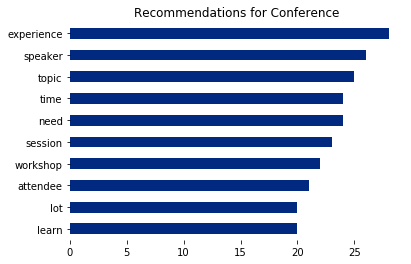

In [149]:
ax = recommendations_df.sort_values(by='count_list').tail(10).plot.barh(x='word_list', 
                                                                       y='count_list', 
                                                                       legend=False, 
                                                                       color="#00297f",
                                                                       title="Recommendations for Conference")
ax.yaxis.set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [43]:
nlp.show_column_keywords(likely.recommendations_text, max_df=.9, stop_words=stopWords, ngram_range=(2,7))

['looking forward',
 'introvert extrovert',
 'mix speaker',
 'high quality',
 'want attend',
 'healthy food',
 'food option',
 'time break',
 'leading team',
 'thought leader',
 'panel workshop',
 'limit speaker',
 'record session',
 'virtual attendance',
 'consider bringing',
 'read article',
 'product design',
 'senior practitioner',
 'having sit',
 'different type']

In [44]:
#ngrams
recommendations_df = find_word_counts(likely.recommendations_text, max_df=.5, stop_words=stopWords, ngram_range=(2,3))
recommendations_df.sort_values(by='count_list').tail(5)

,word_list,count_list
44,thought leader,3
3,case study,3
47,uxr collective,3
4,code conduct,4
23,level experience,5


In [45]:
likely[likely.recommendations_text.notnull()].recommendations_topic_id.value_counts()

speaker, industry      67
group, career, city    57
event, opportunity     52
good, know             45
field, survery         41
Name: recommendations_topic_id, dtype: int64

## Top Documents per Topic

In [46]:
doc_term_matrix, count_vect = nlp.create_wordcount_matrix(likely.recommendations_text, max_df=.3, ngram=(1,3), stop_words=stopWords)

LDA = LatentDirichletAllocation(n_components=4, random_state=42)

LDA.fit(doc_term_matrix)

#nlp.find_top_documents_per_topic(LDA.transform(doc_term_matrix), likely.recommendations_text, 5)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [47]:
recommendations_dict = {0 : 'speaker, industry', 
                        1 : 'event, opportunity', 
                        2 : 'good, know', 
                        3 : 'field, survery', 
                        4 : 'group, career, city'}

In [48]:
nlp.find_top_documents_per_topic(LDA.transform(doc_term_matrix), likely.recommendations_text, 5)

Top 5 Documents for Topic 0: 

Document 1
Please have a conference about research!!! Design is so much more widely accepted and gaining traction, and research teams are coming up right behind them (in my universe, not everywhere). Would love to learn about best practices, methods, how to make an impact. I would love the opportunity to build more solid relationships with the interesting people I have encountered in places like Twitter and Slack. Have it in NYC, that is your stomping ground! Try it as a 1 day event and see how it goes. If it's awesome, make it longer + workshops. I'd love a day in NYC to hear a bunch of talks. I would also love to see how I could be paired or teamed up with people who have a similar level of experience/challenges so we could cohort together and share how we work and help each other advance. Looking forward to hearing more about your findings and how this might manifest into an event!

Document 2
Consider that the audience may be in different maturity lev